<a href="https://colab.research.google.com/github/Ocedy16/Machine-Learning-L2/blob/main/TD_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

iris=sns.load_dataset("iris")
iris.head()
#sns.set()
#sns.pairplot(iris, hue="species")
#plt.show()
X=iris[["petal_length","petal_width"]]
y=iris["species"]
X_train=X[0:90]
y_train=y[0:90]
X_test=X[90:]
y_test=y[90:]


from sklearn.utils import shuffle
X, y= shuffle(X,y)
X_train=X[:90]
y_train=y[:90]
X_test=X[90:]
y_test=y[90:]
X_train
y_train

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test,y_test))
#Score est 1-error


0.9666666666666667
0.95


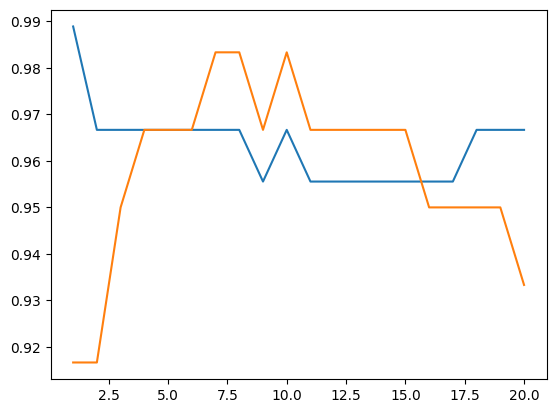

In [ ]:
score_train=[]
score_test=[]
for k in range (1,21):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  score_test.append(knn.score(X_test,y_test))
  score_train.append(knn.score(X_train,y_train))
plt.plot(range(1,21),score_train)
plt.plot(range(1,21),score_test)
plt.show()

In [ ]:
def best_knn_score (X,y):
  X, y= shuffle(X,y)
  X_train=X[:90]
  y_train=y[:90]
  X_test=X[90:]
  y_test=y[90:]

  score_train=[]
  score_test=[]
  for k in range (1,21):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    score_test.append(knn.score(X_test,y_test))
  return max(score_test)

best_knn_score(X,y)


0.9666666666666667

In [ ]:
def best_knn_score_avg(X,y):
  scores=[]
  for i in range(100):
    scores.append(best_knn_score(X,y))
  return np.mean(scores)

best_knn_score_avg(X,y)


0.9731666666666666

In [ ]:
X_=X.copy()

for i in range (len(X_["petal_length"])):
  X_["petal_length"][i]=X["petal_length"][i]/100

best_knn_score_avg(X_,y)

0.9690000000000001

In [ ]:
X_=X.copy()
for i in range (len(X_["petal_width"])):
  X_["petal_width"][i]=X["petal_width"][i]/100

best_knn_score_avg(X_,y)

0.9646666666666667

In [ ]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
best_knn_score_avg(X_scaled,y)
#Cela n'améliore pas les résultats à tous les coups.

0.9761666666666666

In [ ]:
#X_complet=iris[["petal_width","petal_length","sepal_length","sepal_width"]]
X_complet=iris.values[:,0:4]
y=iris.values[:,4]
best_knn_score_avg(X_complet,y)

0.9775